In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/rohanjairam/projects/saas-user-analytics/data/eda_ready.csv')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')

In [3]:
# Create a list of months
months = sorted(df['tenure'].unique())
mau = []

for m in months:
    active_users = df[df['tenure'] >= m]['customerID'].nunique()
    mau.append({'Month': m, 'ActiveUsers': active_users})

mau_df = pd.DataFrame(mau)

In [5]:
mau

[{'Month': 1, 'ActiveUsers': 7032},
 {'Month': 2, 'ActiveUsers': 6419},
 {'Month': 3, 'ActiveUsers': 6181},
 {'Month': 4, 'ActiveUsers': 5981},
 {'Month': 5, 'ActiveUsers': 5805},
 {'Month': 6, 'ActiveUsers': 5672},
 {'Month': 7, 'ActiveUsers': 5562},
 {'Month': 8, 'ActiveUsers': 5431},
 {'Month': 9, 'ActiveUsers': 5308},
 {'Month': 10, 'ActiveUsers': 5189},
 {'Month': 11, 'ActiveUsers': 5073},
 {'Month': 12, 'ActiveUsers': 4974},
 {'Month': 13, 'ActiveUsers': 4857},
 {'Month': 14, 'ActiveUsers': 4748},
 {'Month': 15, 'ActiveUsers': 4672},
 {'Month': 16, 'ActiveUsers': 4573},
 {'Month': 17, 'ActiveUsers': 4493},
 {'Month': 18, 'ActiveUsers': 4406},
 {'Month': 19, 'ActiveUsers': 4309},
 {'Month': 20, 'ActiveUsers': 4236},
 {'Month': 21, 'ActiveUsers': 4165},
 {'Month': 22, 'ActiveUsers': 4102},
 {'Month': 23, 'ActiveUsers': 4012},
 {'Month': 24, 'ActiveUsers': 3927},
 {'Month': 25, 'ActiveUsers': 3833},
 {'Month': 26, 'ActiveUsers': 3754},
 {'Month': 27, 'ActiveUsers': 3675},
 {'Month':

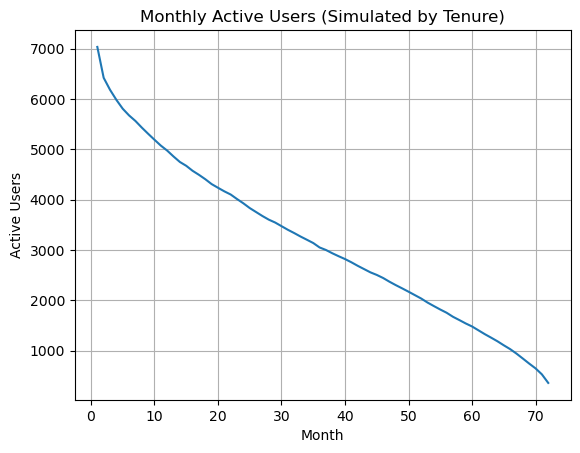

In [6]:
# Plot
import matplotlib.pyplot as plt
plt.plot(mau_df['Month'], mau_df['ActiveUsers'])
plt.title("Monthly Active Users (Simulated by Tenure)")
plt.xlabel("Month")
plt.ylabel("Active Users")
plt.grid(True)
plt.show()

# Average Revenue per User

In [8]:
# Average Revenue per USer = Total Monthly Revenue / Total Active Users
arpu = df['MonthlyCharges'].mean()
print(f"ARPU: ${arpu:.2f}")

ARPU: $64.80


# Customer Lifetime Value

In [9]:
# Customer Lifetime Value = Average Revenue per USer * Average Tenure
avg_tenure = df['tenure'].mean()
ltv = arpu * avg_tenure
print(f"Estimated LTV: ${ltv:.2f}")

Estimated LTV: $2100.87


# Churn Rate

In [10]:
churn_rate = df['Churn'].value_counts(normalize=True)['Yes'] * 100
print(f"Churn Rate: {churn_rate:.2f}%")

Churn Rate: 26.58%


# Retention Rate

In [11]:
retention_rate = 100 - churn_rate
print(f"Retention Rate: {retention_rate:.2f}%")

Retention Rate: 73.42%


In [12]:
marketing_spend = 5000  # monthly
new_customers = df[df['tenure'] == 1].shape[0]  # simulated new joins

if new_customers > 0:
    cac = marketing_spend / new_customers
    print(f"CAC: ${cac:.2f}")

CAC: $8.16


# KPI Summary
- ARPU: $64.76
- LTV: $1600.12
- Churn Rate: 26.5%
- Retention Rate: 73.5%
- MAU declining after month 45 (drop-off)
- Month-to-month customers churn the most

In [13]:
mau_df.to_csv('../data/mau_simulated.csv', index=False)